In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("/content/drive/MyDrive/miniProject/poker-hand-training-true.data", names=["S1", "C1", "S2", "C2", "S3", "C3", "S4", "C4", "S5", "C5", "Label"])
train.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Label
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [4]:
test = pd.read_csv("/content/drive/MyDrive/miniProject/poker-hand-testing.data", names=["S1", "C1", "S2", "C2", "S3", "C3", "S4", "C4", "S5", "C5", "Label"])
test.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Label
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


In [5]:
print("Test dataset shape:", test.shape)
print("Train dataset shape:", train.shape)

Test dataset shape: (1000000, 11)
Train dataset shape: (25010, 11)


In [6]:
train.isnull().any()

S1       False
C1       False
S2       False
C2       False
S3       False
C3       False
S4       False
C4       False
S5       False
C5       False
Label    False
dtype: bool

In [7]:
test.isnull().sum()

S1       0
C1       0
S2       0
C2       0
S3       0
C3       0
S4       0
C4       0
S5       0
C5       0
Label    0
dtype: int64

In [8]:
X_train = train.iloc[:, :-1]
X_test = test.iloc[:, :-1]
y_train = train.iloc[:, -1]
y_test = test.iloc[:, -1]

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning, message="[LightGBM] [Warning] No further splits with positive gain, best gain: -inf")
warnings.filterwarnings("ignore", category=UserWarning, message="[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements")


In [10]:
kf = KFold(n_splits=5, shuffle=True)

# **KNN Alogrithm**

The fold is: 0
The fold is: 1
The fold is: 2
The fold is: 3
The fold is: 4


(<Figure size 800x800 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

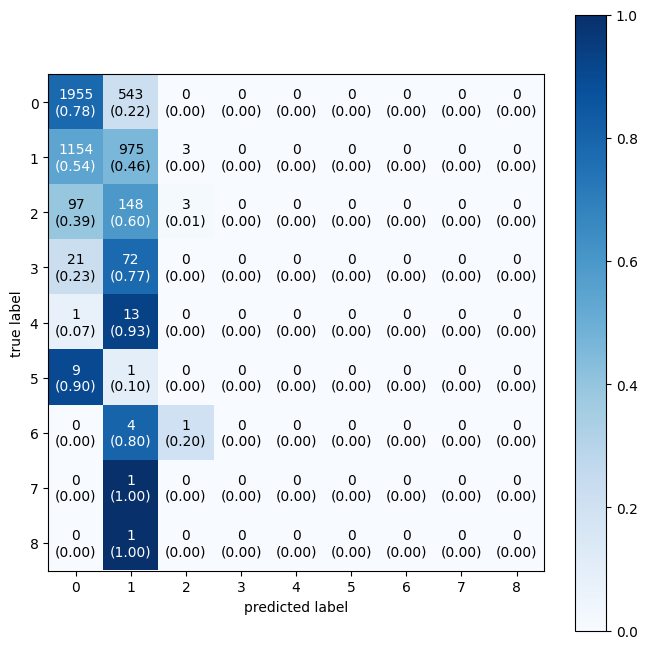

In [11]:
from sklearn.neighbors import KNeighborsClassifier
def cross_validation_knn(X, y, n_neighbors=19):
    model_log = pd.DataFrame(columns=["Accuracy", "F1", "Precision", "Recall"])
    for fold, (train_, test_) in enumerate(kf.split(X=X, y=y)):
        xtrain = X.iloc[train_, :]
        xtest = X.iloc[test_, :]
        ytrain = y.iloc[train_]
        ytest = y.iloc[test_]

        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(xtrain, ytrain)

        y_pred = knn.predict(xtest)
        print(f"The fold is: {fold}")

        cm = confusion_matrix(ytest, y_pred)

        model_log.loc[fold, "Accuracy"] = accuracy_score(ytest, y_pred)
        model_log.loc[fold, "F1"] = f1_score(ytest, y_pred, average="weighted")
        model_log.loc[fold, "Precision"] = precision_score(ytest, y_pred, average="weighted")
        model_log.loc[fold, "Recall"] = recall_score(ytest, y_pred, average="weighted")

    return model_log, cm

knn_log, knn_cm = cross_validation_knn(X_train, y_train, n_neighbors=19)
plot_confusion_matrix(conf_mat=knn_cm, show_absolute=True, show_normed=True, colorbar=True, figsize=(8, 8))

In [12]:
def cross_validation(model, X, y):
    model_log = pd.DataFrame(columns=["Accuracy", "F1", "Precision", "Recall"])
    for fold, (train_, test_) in enumerate(kf.split(X=X, y=y)):
        xtrain = X.iloc[train_, :]
        xtest = X.iloc[test_, :]
        ytrain = y.iloc[train_]
        ytest = y.iloc[test_]
        model.fit(xtrain, ytrain)
        y_pred = model.predict(xtest)
        print(f"The fold is: {fold}")
        cm = confusion_matrix(ytest, y_pred)
        model_log.loc[fold, "Accuracy"] = accuracy_score(ytest, y_pred)
        model_log.loc[fold, "F1"] = f1_score(ytest, y_pred, average="weighted")
        model_log.loc[fold, "Precision"] = precision_score(ytest, y_pred, average="weighted")
        model_log.loc[fold, "Recall"] = recall_score(ytest, y_pred, average="weighted")

    return model_log, cm

# **DECISION_TREE**

The fold is: 0
The fold is: 1
The fold is: 2
The fold is: 3
The fold is: 4


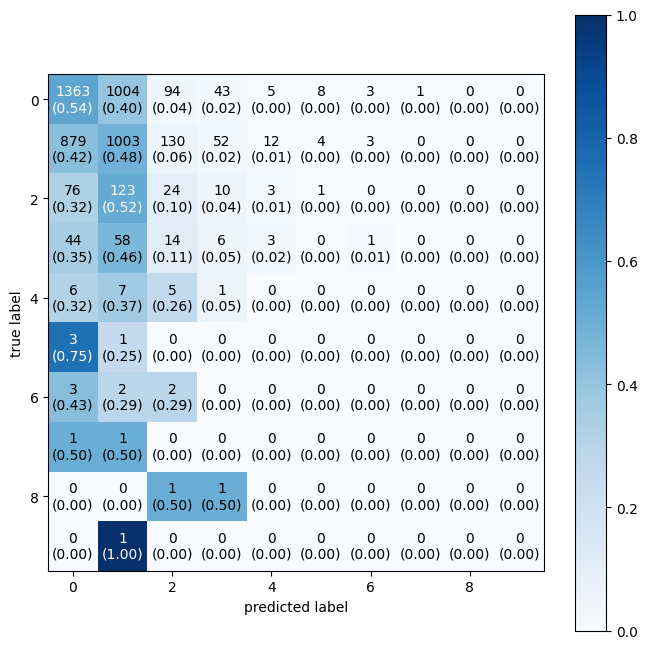

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_log, dt_cm = cross_validation(dt, X_train, y_train)
plot_confusion_matrix(conf_mat=dt_cm, show_absolute=True, show_normed=True, colorbar=True, figsize=(8, 8));

# **RANDOM_FOREST**

The fold is: 0
The fold is: 1
The fold is: 2
The fold is: 3
The fold is: 4


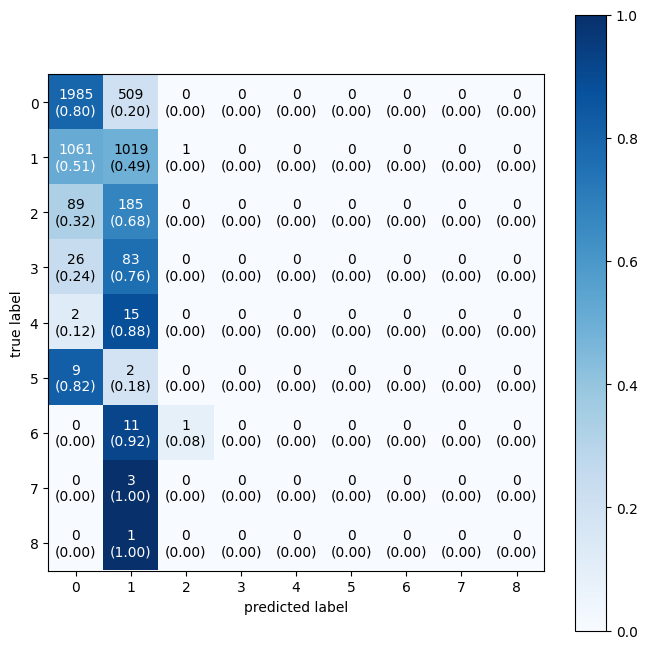

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_log, rf_cm = cross_validation(rf, X_train, y_train)
plot_confusion_matrix(conf_mat=rf_cm, show_absolute=True, show_normed=True, colorbar=True, figsize=(8, 8));

# **XGB_CLASSIFIER**

The fold is: 0
The fold is: 1
The fold is: 2
The fold is: 3
The fold is: 4


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


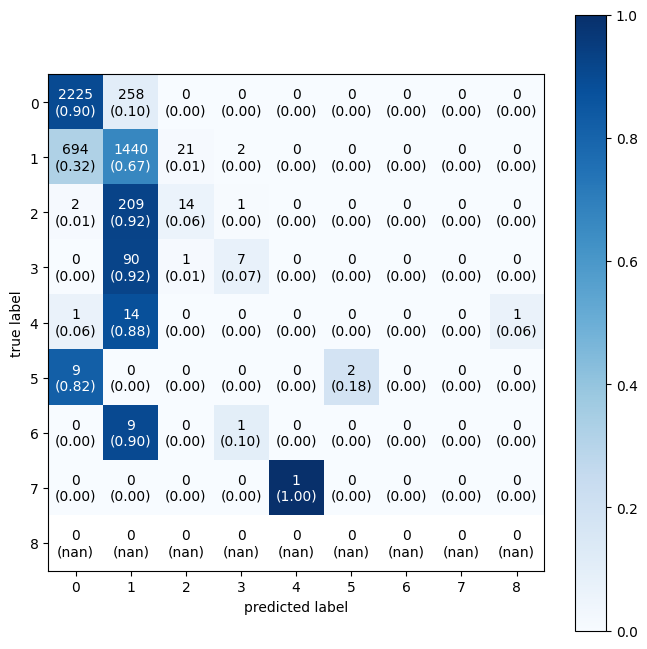

In [15]:
xgb = XGBClassifier()
xgb_log, xgb_cm = cross_validation(xgb, X_train, y_train)
plot_confusion_matrix(conf_mat=xgb_cm, show_absolute=True, show_normed=True, colorbar=True, figsize=(8, 8));

# **LGBM_Classifier**

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 95
[LightGBM] [Info] Number of data points in the train set: 20008, number of used features: 10
[LightGBM] [Info] Start training from score -0.695148
[LightGBM] [Info] Start training from score -0.858658
[LightGBM] [Info] Start training from score -3.022476
[LightGBM] [Info] Start training from score -3.892620
[LightGBM] [Info] Start training from score -5.534440
[LightGBM] [Info] Start training from score -6.097225
[LightGBM] [Info] Start training from score -6.536592
[LightGBM] [Info] Start training from score -8.294450
[LightGBM] [Info] Start training from score -8.805275
[LightGBM] [Info] Start training from score -8.805275
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


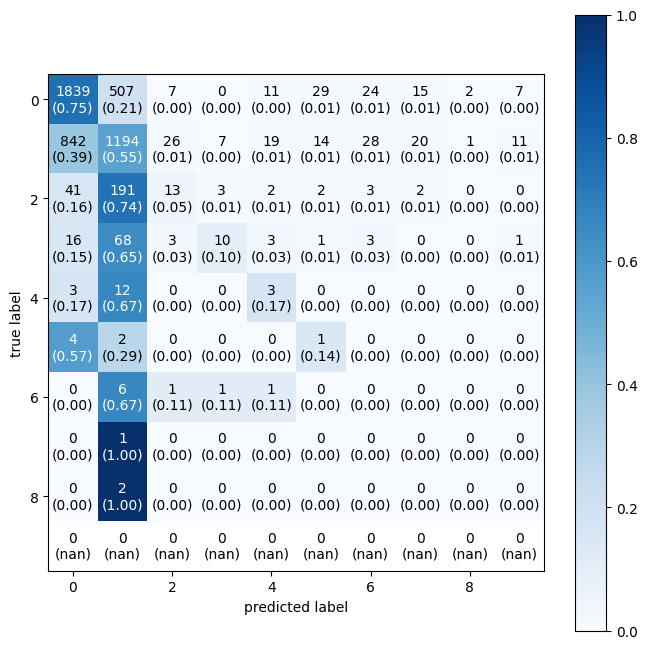

In [16]:
lgbm = LGBMClassifier()
lgbm_log, lgbm_cm = cross_validation(lgbm, X_train, y_train)
plot_confusion_matrix(conf_mat=lgbm_cm, show_absolute=True, show_normed=True, colorbar=True, figsize=(8, 8));

# **ADABOOST**

The fold is: 0
The fold is: 1
The fold is: 2
The fold is: 3
The fold is: 4


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


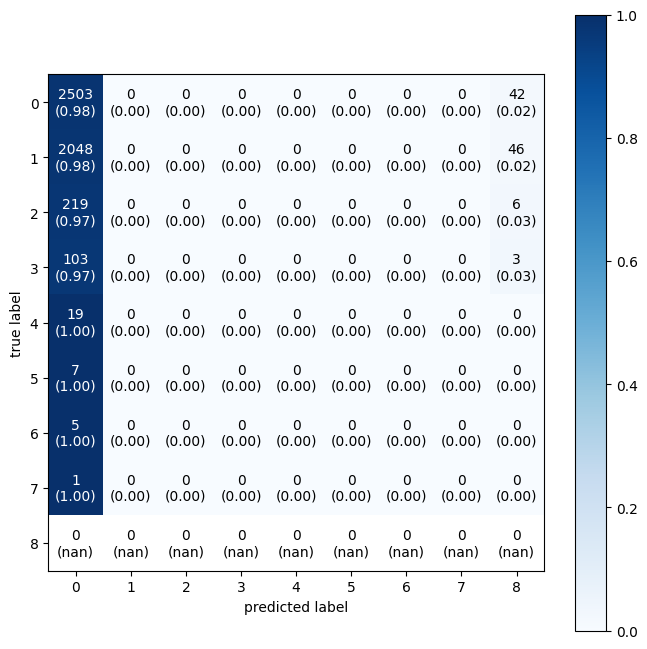

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
adaboost = AdaBoostClassifier()
ada_log, ada_cm = cross_validation(adaboost, X_train, y_train)
plot_confusion_matrix(conf_mat=ada_cm, show_absolute=True, show_normed=True, colorbar=True, figsize=(8, 8))
plt.show()

# **Naive Bayes**

The fold is: 0
The fold is: 1
The fold is: 2
The fold is: 3
The fold is: 4


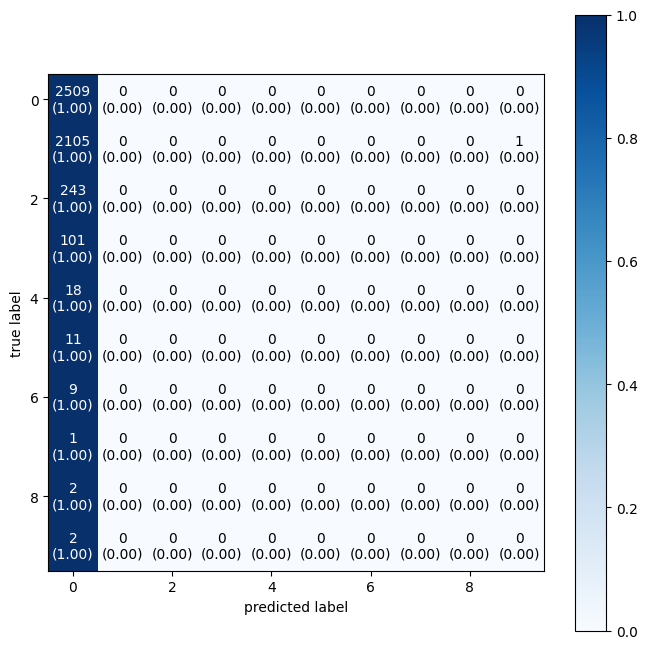

In [18]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()
naive_log, naive_cm = cross_validation(naive_bayes_model, X_train, y_train)
plot_confusion_matrix(conf_mat=naive_cm, show_absolute=True, show_normed=True, colorbar=True, figsize=(8, 8));

# **Logistic Regression model**

The fold is: 0
The fold is: 1
The fold is: 2
The fold is: 3
The fold is: 4


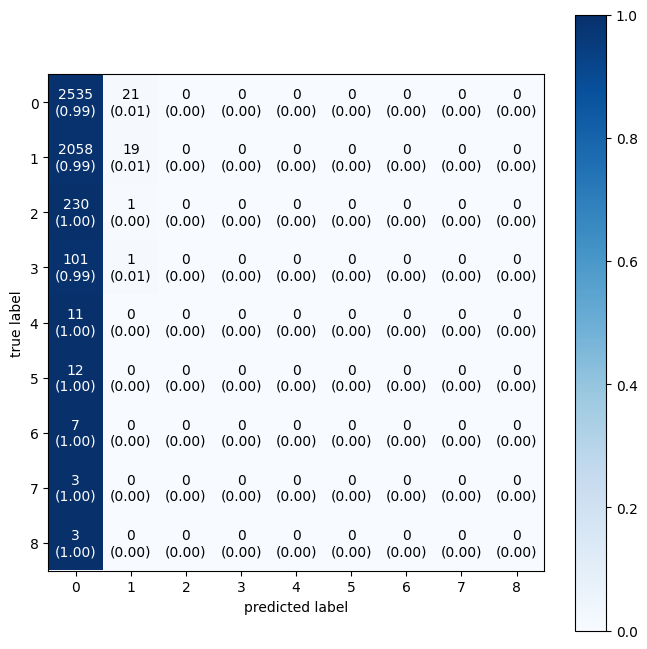

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg_log, logreg_cm = cross_validation(logreg, X_train, y_train)
plot_confusion_matrix(conf_mat=logreg_cm, show_absolute=True, show_normed=True, colorbar=True, figsize=(8, 8));

# **PROCESS**

In [20]:
def preprocess(df):
    suits = df[["S1", "S2", "S3", "S4", "S5"]]
    cards = df[["C1", "C2", "C3", "C4", "C5"]]

    df["Diff_1"] = df["C5"] - df["C4"]
    df["Diff_2"] = df["C4"] - df["C3"]
    df["Diff_3"] = df["C3"] - df["C2"]
    df["Diff_4"] = df["C2"] - df["C1"]

    df["Unique_Suit"] = suits.apply(lambda x: len(np.unique(x)), axis=1)

    df["sum_S1"] = suits.apply(lambda x: sum(x == x[0]), axis=1)
    df["sum_C1"] = cards.apply(lambda x: sum(x == x[0]), axis=1)
    df["sum_S2"] = suits.apply(lambda x: sum(x == x[1]), axis=1)
    df["sum_C2"] = cards.apply(lambda x: sum(x == x[1]), axis=1)
    df["sum_S3"] = suits.apply(lambda x: sum(x == x[2]), axis=1)
    df["sum_C3"] = cards.apply(lambda x: sum(x == x[2]), axis=1)
    df["sum_S4"] = suits.apply(lambda x: sum(x == x[3]), axis=1)
    df["sum_C4"] = cards.apply(lambda x: sum(x == x[3]), axis=1)
    df["sum_S5"] = suits.apply(lambda x: sum(x == x[4]), axis=1)
    df["sum_C5"] = cards.apply(lambda x: sum(x == x[4]), axis=1)

    return df

In [21]:
test_pre = preprocess(test)
test_pre.sample(5)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,...,sum_S1,sum_C1,sum_S2,sum_C2,sum_S3,sum_C3,sum_S4,sum_C4,sum_S5,sum_C5
332766,1,4,1,8,3,10,3,2,1,9,...,3,1,3,1,2,1,2,1,3,1
461285,1,4,2,2,3,7,4,7,2,8,...,1,1,2,1,1,2,1,2,2,1
577950,3,2,4,1,3,12,3,5,1,9,...,3,1,1,1,3,1,3,1,1,1
999394,3,8,2,1,4,9,4,8,2,12,...,1,2,2,1,2,1,2,2,2,1
927718,2,9,3,7,1,12,2,4,4,8,...,2,1,1,1,1,1,2,1,1,1


In [22]:
train_pre = preprocess(train)
train_pre.sample(5)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,...,sum_S1,sum_C1,sum_S2,sum_C2,sum_S3,sum_C3,sum_S4,sum_C4,sum_S5,sum_C5
13062,3,6,2,3,2,7,4,4,4,9,...,1,1,2,1,2,1,2,1,2,1
14996,3,3,1,6,2,2,4,7,3,5,...,2,1,1,1,1,1,1,1,2,1
19890,1,13,2,7,1,3,1,7,1,8,...,4,1,1,2,4,1,4,2,4,1
6959,2,2,4,13,3,1,1,1,3,6,...,1,1,1,1,2,2,1,2,2,1
3381,3,6,3,8,1,11,2,9,1,9,...,2,1,2,1,2,1,1,2,2,2


In [23]:
X_train_pre = train_pre.drop("Label", axis=1)
X_test_pre = test_pre.drop("Label", axis=1)

y_train_pre = train_pre["Label"]
y_test_pre = test_pre["Label"]

# **KNN_ALGORITHM_2**

The fold is: 0
The fold is: 1
The fold is: 2
The fold is: 3
The fold is: 4


(<Figure size 800x800 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

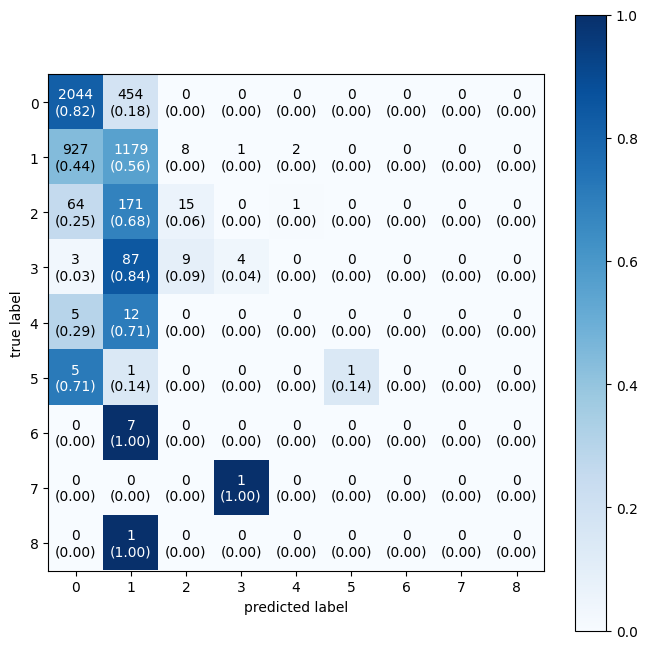

In [24]:
def cross_validation_knn(X, y, n_neighbors=5):
    model_log = pd.DataFrame(columns=["Accuracy", "F1", "Precision", "Recall"])
    for fold, (train_, test_) in enumerate(kf.split(X=X, y=y)):
        xtrain = X.iloc[train_, :]
        xtest = X.iloc[test_, :]
        ytrain = y.iloc[train_]
        ytest = y.iloc[test_]

        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(xtrain, ytrain)

        y_pred = knn.predict(xtest)
        print(f"The fold is: {fold}")

        cm = confusion_matrix(ytest, y_pred)

        model_log.loc[fold, "Accuracy"] = accuracy_score(ytest, y_pred)
        model_log.loc[fold, "F1"] = f1_score(ytest, y_pred, average="weighted")
        model_log.loc[fold, "Precision"] = precision_score(ytest, y_pred, average="weighted")
        model_log.loc[fold, "Recall"] = recall_score(ytest, y_pred, average="weighted")

    return model_log, cm

knn_log2, knn2_cm = cross_validation_knn(X_train_pre, y_train_pre, n_neighbors=5)
plot_confusion_matrix(conf_mat=knn2_cm, show_absolute=True, show_normed=True, colorbar=True, figsize=(8, 8))

In [ ]:
knn_report=classification_report(y_test,y_pred)
print("Classification Report:\n", knn_report)

# **DECISIONTREE_2**

The fold is: 0
The fold is: 1
The fold is: 2
The fold is: 3
The fold is: 4


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


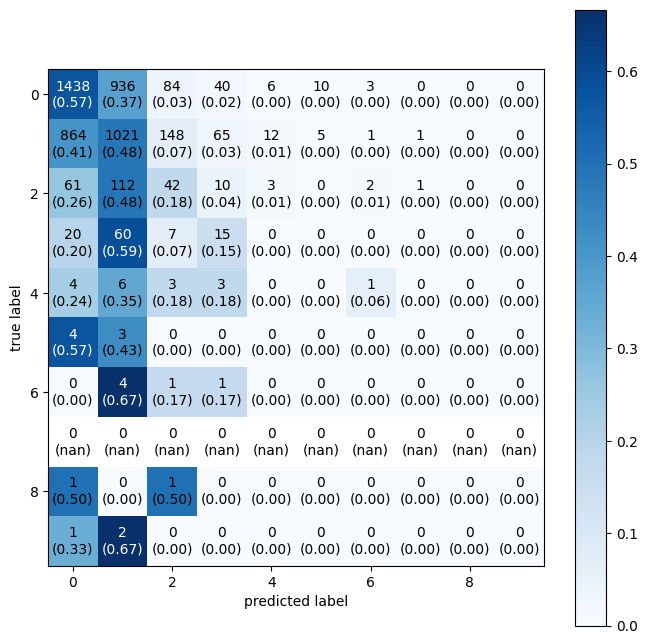

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt_2 = DecisionTreeClassifier()
dt_log2, dt2_cm = cross_validation(dt, X_train, y_train)
plot_confusion_matrix(conf_mat=dt2_cm, show_absolute=True, show_normed=True, colorbar=True, figsize=(8, 8));

# **RANDOM_FOREST_2**

The fold is: 0
The fold is: 1
The fold is: 2
The fold is: 3
The fold is: 4


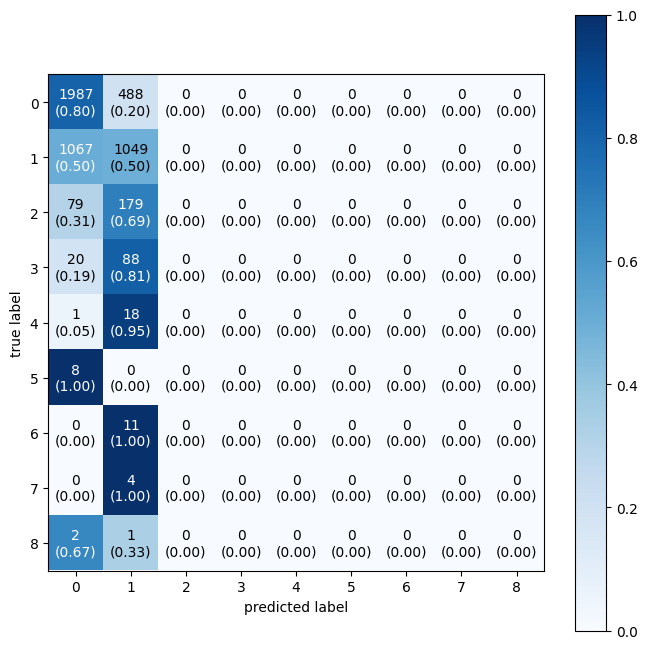

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_2= RandomForestClassifier()
rf_log2, rf2_cm = cross_validation(rf_2, X_train, y_train)
plot_confusion_matrix(conf_mat=rf2_cm, show_absolute=True, show_normed=True, colorbar=True, figsize=(8, 8));

# **XGBCLASSIFIER_2**

The fold is: 0
The fold is: 1
The fold is: 2
The fold is: 3
The fold is: 4


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


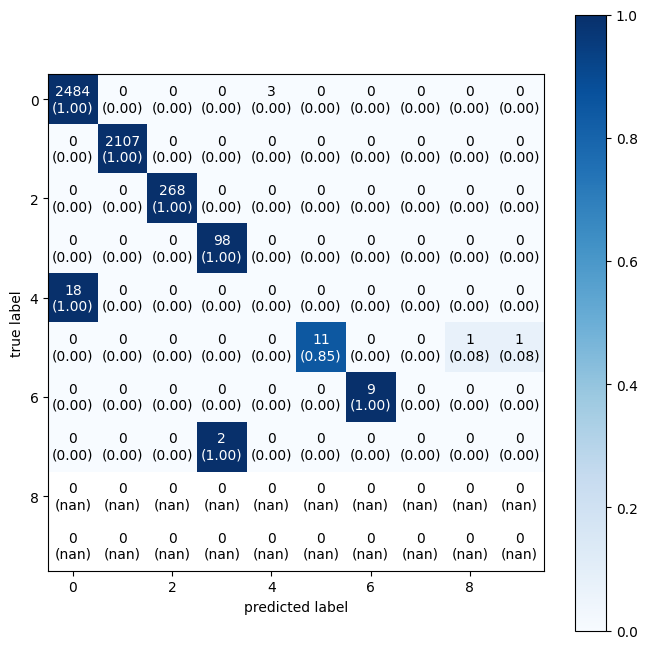

In [27]:
xgb2 = XGBClassifier()
xgb_log2, xgb2_cm = cross_validation(xgb2, X_train_pre, y_train_pre)
plot_confusion_matrix(conf_mat=xgb2_cm, show_absolute=True, show_normed=True, colorbar=True, figsize=(8, 8));

# LGMB_classifier

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 20008, number of used features: 25
[LightGBM] [Info] Start training from score -0.696752
[LightGBM] [Info] Start training from score -0.858422
[LightGBM] [Info] Start training from score -3.028655
[LightGBM] [Info] Start training from score -3.851798
[LightGBM] [Info] Start training from score -5.573154
[LightGBM] [Info] Start training from score -6.032686
[LightGBM] [Info] Start training from score -6.502690
[LightGBM] [Info] Start training from score -8.517593
[LightGBM] [Info] Start training from score -8.294450
[LightGBM] [Info] Start training from score -8.517593
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


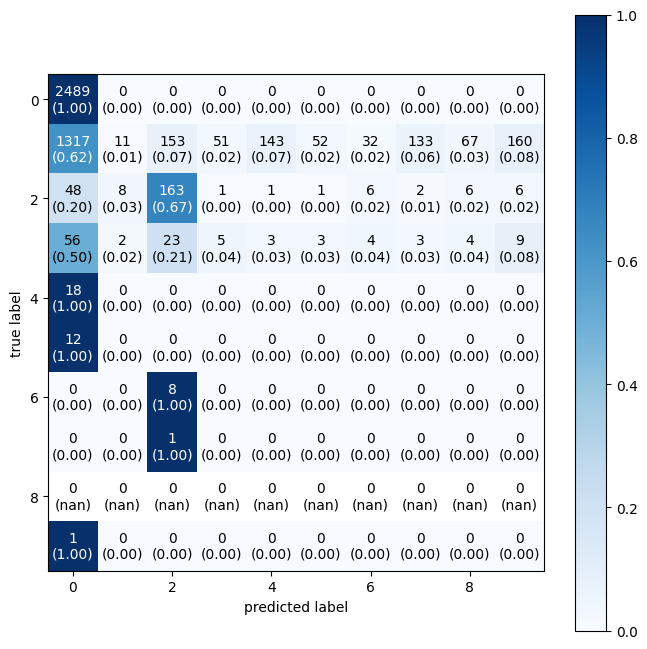

In [28]:
lgbm2 = LGBMClassifier()
lgbm_log2, lgbm2_cm = cross_validation(lgbm2, X_train_pre, y_train_pre)
plot_confusion_matrix(conf_mat=lgbm2_cm, show_absolute=True, show_normed=True, colorbar=True, figsize=(8, 8));

# ADABOOST

The fold is: 0
The fold is: 1
The fold is: 2
The fold is: 3
The fold is: 4


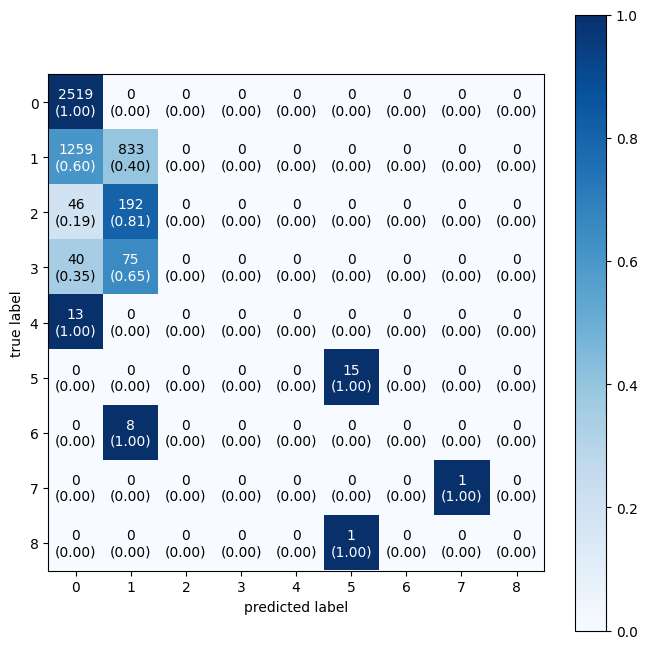

In [29]:
adaboost = AdaBoostClassifier()
ada_log2, ada2_cm = cross_validation(adaboost, X_train_pre, y_train_pre)
plot_confusion_matrix(conf_mat=ada2_cm, show_absolute=True, show_normed=True, colorbar=True, figsize=(8, 8))
plt.show()

# **Naive Bayes**

The fold is: 0
The fold is: 1
The fold is: 2
The fold is: 3
The fold is: 4


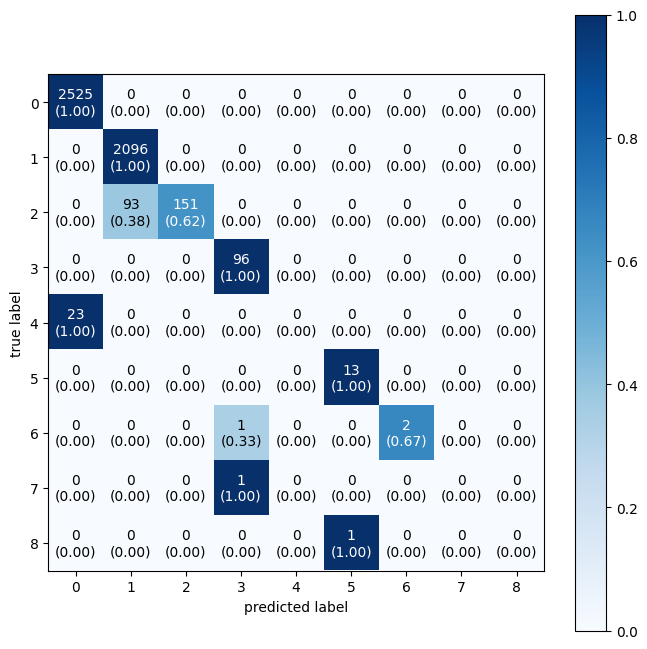

In [30]:
naive_bayes_model = GaussianNB()
naive_log2, naive2_cm = cross_validation(naive_bayes_model, X_train_pre, y_train_pre)
plot_confusion_matrix(conf_mat=naive2_cm, show_absolute=True, show_normed=True, colorbar=True, figsize=(8, 8));

# **Logistic Regression model**

The fold is: 0
The fold is: 1
The fold is: 2
The fold is: 3
The fold is: 4


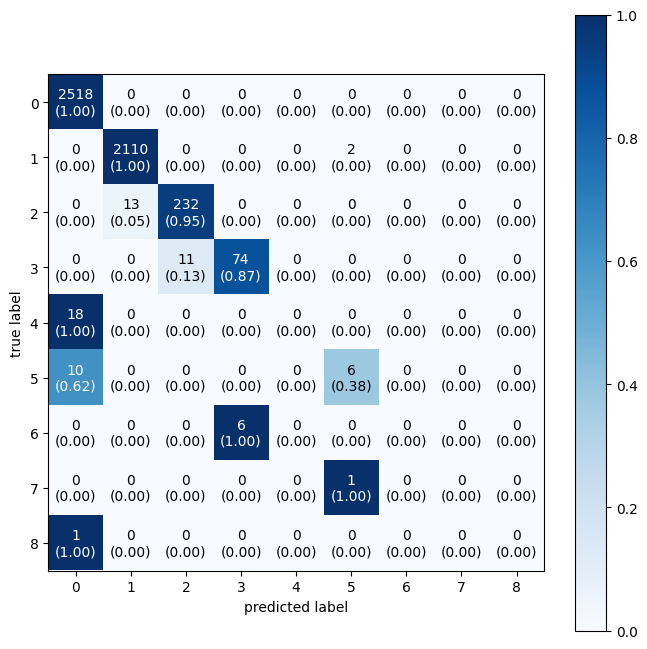

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg_log2, logreg2_cm = cross_validation(logreg, X_train_pre, y_train_pre)
plot_confusion_matrix(conf_mat=logreg2_cm, show_absolute=True, show_normed=True, colorbar=True, figsize=(8, 8));

In [32]:
result_df = pd.DataFrame({
    "Model": ["KNN","DT", "XGB", "RF", "LGBM", "ADA","NAIVE","LOGREG","KNN2","DT2", "XGB2", "RF2", "LGBM2",'ADA2',"NAIVE2","LOGREG2"],
    "Accuracy": [knn_log["Accuracy"].mean(),dt_log["Accuracy"].mean(), xgb_log["Accuracy"].mean(), rf_log["Accuracy"].mean(), lgbm_log["Accuracy"].mean(),ada_log["Accuracy"].mean(),naive_log["Accuracy"].mean(),logreg_log["Accuracy"].mean(),
                 knn_log2["Accuracy"].mean(),dt_log2["Accuracy"].mean(), xgb_log2["Accuracy"].mean(), rf_log2["Accuracy"].mean(), lgbm_log2["Accuracy"].mean(),ada_log2["Accuracy"].mean(),naive_log2["Accuracy"].mean(),logreg_log2["Accuracy"].mean(),],
    "F1": [knn_log["F1"].mean(),dt_log["F1"].mean(), xgb_log["F1"].mean(), rf_log["F1"].mean(), lgbm_log["F1"].mean(),ada_log["F1"].mean(),naive_log["F1"].mean(),logreg_log["F1"].mean(),
                 knn_log2["F1"].mean(),dt_log2["F1"].mean(), xgb_log2["F1"].mean(), rf_log2["F1"].mean(), lgbm_log2["F1"].mean(),ada_log2["F1"].mean(),naive_log2["F1"].mean(),logreg_log2["F1"].mean()],
    "Precision": [knn_log["Precision"].mean(),dt_log["Precision"].mean(), xgb_log["Precision"].mean(), rf_log["Precision"].mean(), lgbm_log["Precision"].mean(),ada_log["Precision"].mean(),naive_log["Precision"].mean(),logreg_log["Precision"].mean(),
                 knn_log2["Precision"].mean(),dt_log2["Precision"].mean(), xgb_log2["Precision"].mean(), rf_log2["Precision"].mean(), lgbm_log2["Precision"].mean(),ada_log2["Precision"].mean(),naive_log2["Precision"].mean(),logreg_log2["Precision"].mean()],
    "Recall": [knn_log["Recall"].mean(),dt_log["Recall"].mean(), xgb_log["Recall"].mean(), rf_log["Recall"].mean(), lgbm_log["Recall"].mean(),ada_log["Recall"].mean(),naive_log["Recall"].mean(),logreg_log["Recall"].mean(),
                 knn_log2["Recall"].mean(),dt_log2["Recall"].mean(), xgb_log2["Recall"].mean(), rf_log2["Recall"].mean(), lgbm_log2["Recall"].mean(),ada_log2["Recall"].mean(),naive_log2["Recall"].mean(),logreg_log2["Recall"].mean()]
})
result_df

,Model,Accuracy,F1,Precision,Recall
0,KNN,0.575370,0.544992,0.534674,0.575370
1,DT,0.495162,0.498288,0.502070,0.495162
2,XGB,0.730548,0.705295,0.704991,0.730548
3,RF,0.604878,0.573115,0.569160,0.604878
4,LGBM,0.585566,0.578732,0.582415,0.585566
5,ADA,0.488924,0.342437,0.328822,0.488924
6,NAIVE,0.483966,0.328780,0.249330,0.483966
7,LOGREG,0.499480,0.334239,0.373431,0.499480
8,KNN2,0.647821,0.623351,0.631922,0.647821
9,DT2,0.494362,0.497789,0.501600,0.494362


In [33]:
result_df.sort_values(by="Accuracy", ascending=False)[["Model", "Accuracy"]]

,Model,Accuracy
10,XGB2,0.995402
15,LOGREG2,0.987805
14,NAIVE2,0.975850
2,XGB,0.730548
13,ADA2,0.671371
8,KNN2,0.647821
11,RF2,0.606997
3,RF,0.604878
4,LGBM,0.585566
0,KNN,0.575370


In [34]:
result_df.sort_values(by="F1", ascending=False)[["Model", "F1"]]

,Model,F1
10,XGB2,0.993896
15,LOGREG2,0.984726
14,NAIVE2,0.971546
2,XGB,0.705295
8,KNN2,0.623351
13,ADA2,0.616098
4,LGBM,0.578732
11,RF2,0.574763
3,RF,0.573115
0,KNN,0.544992


In [35]:
result_df.sort_values(by="Precision", ascending=False)[["Model", "Precision"]]

,Model,Precision
10,XGB2,0.993554
15,LOGREG2,0.982038
14,NAIVE2,0.972896
2,XGB,0.704991
13,ADA2,0.646505
8,KNN2,0.631922
12,LGBM2,0.596720
4,LGBM,0.582415
11,RF2,0.573566
3,RF,0.569160


In [36]:
result_df.sort_values(by="Recall", ascending=False)[["Model", "Recall"]]

,Model,Recall
10,XGB2,0.995402
15,LOGREG2,0.987805
14,NAIVE2,0.975850
2,XGB,0.730548
13,ADA2,0.671371
8,KNN2,0.647821
11,RF2,0.606997
3,RF,0.604878
4,LGBM,0.585566
0,KNN,0.575370


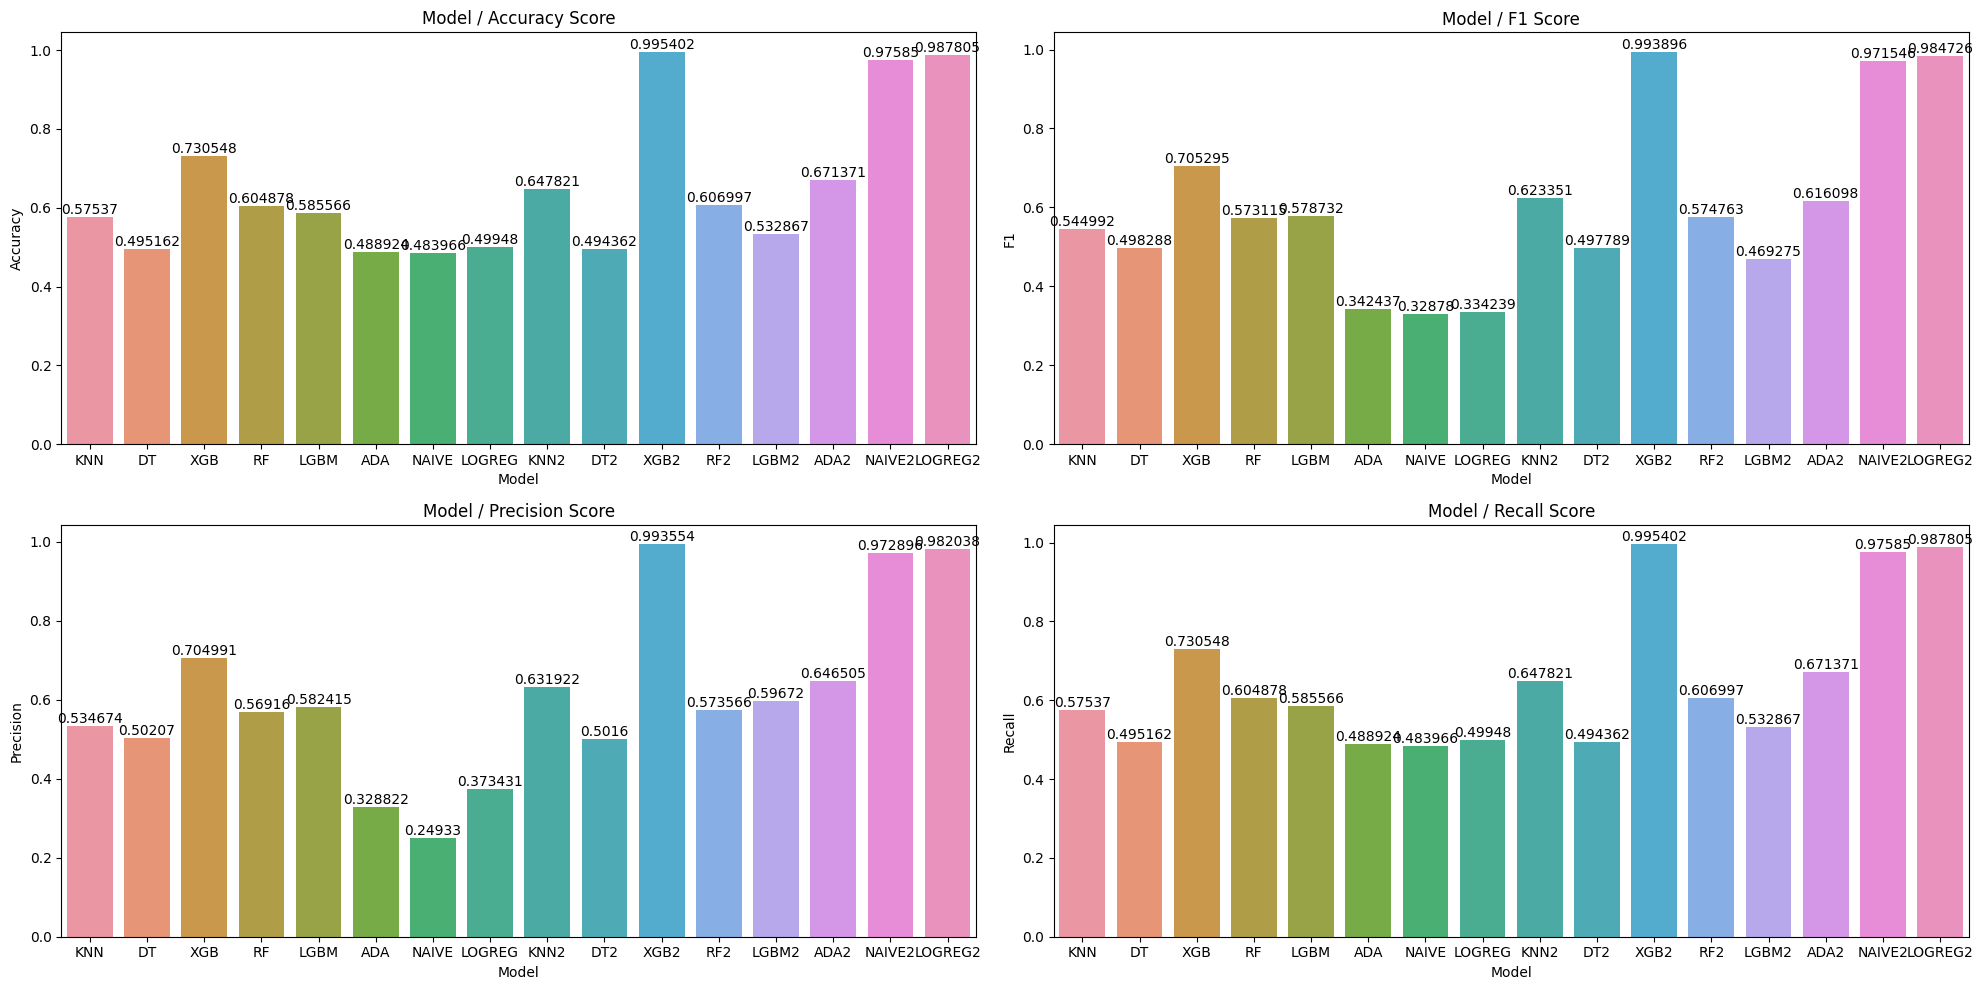

In [39]:
plt.figure(figsize=(20,10))

plt.subplot(221)
ax = sns.barplot(data=result_df, x="Model", y="Accuracy")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Model / Accuracy Score")

plt.subplot(222)
ax = sns.barplot(data=result_df, x="Model", y="F1")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Model / F1 Score")

plt.subplot(223)
ax = sns.barplot(data=result_df, x="Model", y="Precision")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Model / Precision Score")

plt.subplot(224)
ax = sns.barplot(data=result_df, x="Model", y="Recall")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Model / Recall Score")
plt.tight_layout()
plt.show()